<a href="https://colab.research.google.com/github/bhavikakaura/Dataa-for-Risk-Analysis-of-5G-Network-Security/blob/main/FN_Curve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import files
uploaded = files.upload()


Saving realistic_5G_security_dataset (1).csv to realistic_5G_security_dataset (1) (4).csv


Saving realistic_5G_security_dataset (1).csv to realistic_5G_security_dataset (1) (5).csv


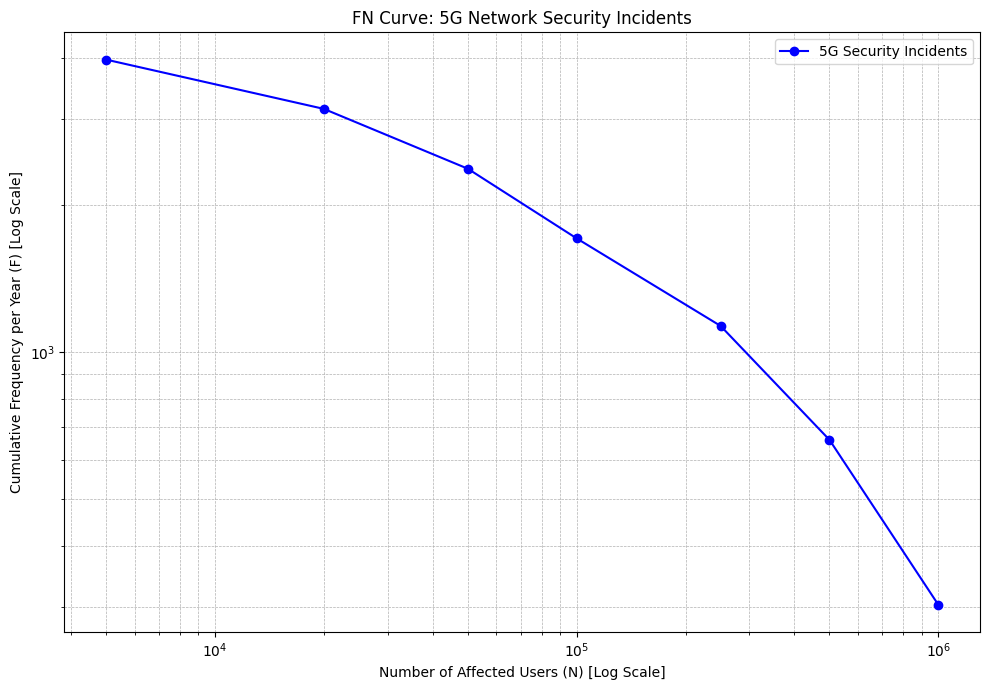

In [8]:
# Step 1: Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Step 2: Upload the CSV file (this will allow you to manually upload your file in the Colab interface)
from google.colab import files
uploaded = files.upload()

# Step 3: Load and preview the dataset
file_path = 'realistic_5G_security_dataset (1).csv'  # Adjust if necessary based on the file you uploaded
df_5g = pd.read_csv(file_path)
df_5g.head()  # Preview the first few rows

# Step 4: Process data for FN Curve
# Convert 'Affected_Users_k' from thousands to actual users
df_5g['Affected_Users'] = df_5g['Affected_Users_k'] * 1000

# Group by number of affected users and sum frequencies
severity_freq = df_5g.groupby('Affected_Users')['Incident_Frequency_Yearly'].sum().sort_index()

# Step 5: Calculate cumulative frequency (descending order of severity)
cumulative_freq = severity_freq[::-1].cumsum()[::-1]

# Step 6: Plot the FN curve
plt.figure(figsize=(10, 7))
plt.loglog(severity_freq.index, cumulative_freq.values, marker='o', color='blue', label='5G Security Incidents')

# Step 7: Add titles and labels
plt.title("FN Curve: 5G Network Security Incidents")
plt.xlabel("Number of Affected Users (N) [Log Scale]")
plt.ylabel("Cumulative Frequency per Year (F) [Log Scale]")
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()
